In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Maxcap

In [2]:
#Data = [11,12,22,25,33,34,36,37]
# Test= [25,36]
ch=[11,12,25,33,34,37]
frames=pd.DataFrame()
maxcap=[]
meanV=[]
meanI=[]
cycle=[]    
meanT=[]
maxcap_prev=[]
for k in ch:
    df=pd.read_csv('MajorProject/csvdata/CH'+str(k)+'.csv')
    mc=[]
    for i in range(10,1000):
       
        #a=np.array(df[df['Cycle_Index']==float(i)]['Charge_Capacity'])
        #b=np.array(df[df['Cycle_Index']==float(i)]['Voltage'])
        #c=np.absolute(np.array(df[df['Cycle_Index']==float(i)]['Current']))
        #d=np.array(df[df['Cycle_Index']==float(i)]['Temperature'])
        a=np.array(df[df['cycle']==float(i)]['charge'])
        if(len(a)==0):
            break
        b=np.array(df[df['cycle']==float(i)]['voltage'])
        c=np.absolute(np.array(df[df['cycle']==float(i)]['current']))
        d=np.array(df[df['cycle']==float(i)]['temp'])
        cycle.append(i)
     
        mc.append(max(a))
        meanV.append(np.mean(b))
        meanI.append(np.mean(c))
        meanT.append(np.mean(d))
    maxcap.extend(mc/max(mc))
cycle=np.array(cycle)
meanI=np.array(meanI)
meanV=np.array(meanV)
meanT=np.array(meanT)
x=np.array([cycle,meanV,meanI,meanT])
x=pd.DataFrame(x).transpose()
y=pd.DataFrame(maxcap)
x.columns=['cycle','meanV','meanI','meanT']
y.columns=['maxcap']

Text(0, 0.5, 'MaxCap')

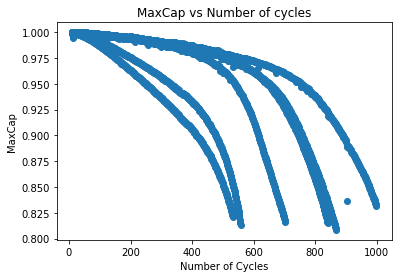

In [3]:
plt.scatter(x['cycle'],y)
plt.title('MaxCap vs Number of cycles')
plt.xlabel('Number of Cycles')
plt.ylabel('MaxCap')

In [27]:
df=pd.concat([x,y],1)
df.to_csv('Maxcap_train.csv')

In [29]:
#Data = [11,12,22,25,33,34,36,37]
ch= [22,36]

frames=pd.DataFrame()
maxcap=[]
meanV=[]
meanI=[]
cycle=[]    
meanT=[]
maxcap_prev=[]
for k in ch:
    df=pd.read_csv('MajorProject/csvdata/CH'+str(k)+'.csv')
    
    for i in range(10,1000):
       
        #a=np.array(df[df['Cycle_Index']==float(i)]['Charge_Capacity'])
        #b=np.array(df[df['Cycle_Index']==float(i)]['Voltage'])
        #c=np.absolute(np.array(df[df['Cycle_Index']==float(i)]['Current']))
        #d=np.array(df[df['Cycle_Index']==float(i)]['Temperature'])
        a=np.array(df[df['cycle']==float(i)]['charge'])
        if(len(a)==0):
            break
        b=np.array(df[df['cycle']==float(i)]['voltage'])
        c=np.absolute(np.array(df[df['cycle']==float(i)]['current']))
        d=np.array(df[df['cycle']==float(i)]['temp'])
        cycle.append(i)
     
        mc.append(max(a))
        meanV.append(np.mean(b))
        meanI.append(np.mean(c))
        meanT.append(np.mean(d))
    maxcap.extend(mc/max(mc))
cycle=np.array(cycle)
meanI=np.array(meanI)
meanV=np.array(meanV)
meanT=np.array(meanT)
x_test=np.array([cycle,meanV,meanI,meanT])
x_test=pd.DataFrame(x_test).transpose()
y_test=pd.DataFrame(maxcap)
x_test.columns=['cycle','meanV','meanI','meanT']
y_test.columns=['maxcap']

In [30]:
df_test=pd.concat([x_test,y_test],1)
df_test.to_csv('Maxcap_test.csv')

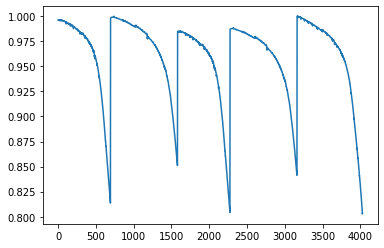

In [31]:
plt.plot(y_test)

## SoC

In [3]:
ch=[11,12,25,33,34,37]
d=[]
for k in ch:
    data=pd.read_csv('MajorProject/csvdata/CH'+str(k)+'.csv')
    data=data.groupby(np.arange(len(data))//10).mean()
    d.append(data)
df=pd.concat(d,0)
df.reset_index(drop=True,inplace=True)

In [12]:
df=df[['cycle', 'time', 'current', 'voltage', 'temp','soc']]
df.to_csv('soc-train.csv',index=False)

In [13]:
ch= [22,36]
d=[]
for k in ch:
    data=pd.read_csv('MajorProject/csvdata/CH'+str(k)+'.csv')
    data=data.groupby(np.arange(len(data))//10).mean()
    d.append(data)
df=pd.concat(d,0)
df.reset_index(drop=True,inplace=True)

In [14]:
df=df[['cycle', 'time', 'current', 'voltage', 'temp','soc']]
df.to_csv('soc-test.csv',index=False)